<center><h1>DSCI 552 HW7</h1></center>

Name: Wenyu Yang
<br>
Github Username:wenyu-y
<br>
USC ID: 2609125538

In [333]:
# packages for this homework7
import pandas as pd  # data processing
import numpy as np   # N-DIMENSIONAL ARRAYS
from sklearn.model_selection import train_test_split
from sklearn.metrics import hamming_loss
import seaborn as sns # visualization
import matplotlib.pyplot as plt  # visualization
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

<h3>1. Multi-class and Multi-Label Classification Using Support Vector Machines</h3>

<h5>(a) Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics. uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the data randomly as the training set.</h5>

In [17]:
data=pd.read_csv('../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv')
data

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [18]:
#reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split
x=data.drop(['Family','Genus','Species','RecordID'],axis=1)
y=data[['Family','Genus','Species']]
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3,train_size=0.7, random_state=42)
train_x

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
2004,1.000000,0.327476,0.282440,0.572211,0.096509,-0.036705,-0.082174,0.146604,0.297338,-0.120902,...,0.438532,-0.148451,-0.260375,0.178628,0.218024,-0.042083,-0.126511,-0.090279,0.096176,0.191697
1194,1.000000,0.232818,-0.144331,-0.078909,-0.072467,0.255380,0.450215,0.261033,-0.168462,-0.281445,...,-0.108483,0.329984,0.274031,-0.157579,-0.291979,-0.042932,-0.009021,-0.032679,0.023912,0.041407
5359,0.966443,0.455914,1.000000,0.541650,-0.412873,0.307099,0.235819,-0.064025,0.069728,-0.052552,...,-0.073050,-0.140994,0.162584,-0.007981,-0.049428,-0.053166,-0.026728,0.029443,0.019032,-0.105221
1756,1.000000,0.257873,0.112807,0.527614,0.186094,0.043683,-0.163682,-0.014125,0.196527,0.018839,...,0.404813,-0.075488,-0.320882,0.024806,0.226971,0.034969,-0.106029,-0.147124,0.042627,0.250249
497,1.000000,0.401859,0.563219,0.578304,-0.126517,-0.058725,0.431806,0.066801,-0.321014,0.155569,...,-0.132244,0.190753,0.126674,-0.148049,-0.002891,0.157072,-0.015251,-0.055428,0.086927,0.086006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1.000000,0.406366,0.268684,0.704863,0.358415,0.055376,-0.159812,0.065813,0.345068,0.175460,...,0.378497,-0.014091,-0.352985,0.015183,0.220504,0.054246,-0.069108,-0.174583,-0.032202,0.188263
5191,1.000000,0.634337,0.594395,0.403271,0.004960,0.037880,-0.065399,0.125276,0.106976,-0.223357,...,-0.228140,-0.274889,0.244973,0.096130,-0.140923,0.003646,0.007163,0.068718,0.047640,-0.179215
5226,1.000000,0.756413,0.732319,0.385807,-0.034821,0.073881,-0.058027,0.183775,0.219419,-0.445112,...,-0.177708,-0.311815,0.182382,0.030100,-0.182019,0.006296,-0.005868,0.029439,0.004783,-0.198014
5390,0.931410,0.626137,1.000000,0.375834,-0.223044,0.325943,0.121659,-0.092542,0.163365,-0.049382,...,-0.047610,-0.188463,0.102240,0.150353,-0.054750,-0.054434,0.108092,0.156994,-0.051681,-0.085656


In [19]:
train_y

,Family,Genus,Species
2004,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1194,Dendrobatidae,Ameerega,Ameeregatrivittata
5359,Hylidae,Hypsiboas,HypsiboasCinerascens
1756,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
497,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...
3772,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
5191,Hylidae,Hypsiboas,HypsiboasCinerascens
5226,Hylidae,Hypsiboas,HypsiboasCinerascens
5390,Hylidae,Hypsiboas,HypsiboasCinerascens


In [20]:
test_x

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
3340,1.0,0.147506,0.014843,0.433466,0.169581,0.053135,-0.152020,-0.102427,0.153061,0.128628,...,0.341701,0.008463,-0.290680,0.016310,0.285756,0.166246,-0.061206,-0.191878,0.003221,0.255371
5108,1.0,0.674174,0.767520,0.392177,0.035669,0.181548,-0.013677,0.187262,0.144679,-0.424524,...,-0.142909,-0.209932,0.285255,0.103722,-0.157943,-0.048913,-0.016129,0.129200,0.011245,-0.275909
6524,1.0,-0.007777,0.363276,0.413224,0.196296,0.222389,0.097128,-0.155608,-0.035013,0.133689,...,0.016052,-0.028317,-0.102525,-0.005594,0.125169,0.044882,-0.013309,-0.026086,-0.088825,-0.018968
3649,1.0,0.429359,0.297881,0.609120,0.263991,-0.030414,-0.160778,0.076217,0.285909,0.052029,...,0.374639,0.012647,-0.317314,-0.023621,0.230330,0.069015,-0.101196,-0.152351,0.039065,0.233823
1617,1.0,0.190599,0.062234,0.617262,0.208825,0.027108,-0.214441,0.009654,0.299053,0.039013,...,0.402628,-0.110486,-0.306343,0.082182,0.321598,0.128742,-0.152977,-0.223482,0.016131,0.250754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,1.0,0.469993,0.342252,0.508362,0.184239,0.138370,-0.070231,0.034221,0.226367,-0.001120,...,0.256172,-0.229460,-0.247905,0.179489,0.186595,-0.080672,-0.104266,-0.077342,0.159712,0.239398
142,1.0,0.162558,-0.115829,0.045608,0.226107,0.325952,0.157953,-0.124050,-0.009148,0.235613,...,-0.318516,0.312135,0.401665,0.120251,-0.120102,-0.226043,-0.161989,0.037390,0.185305,0.059824
1490,1.0,0.160219,0.137078,0.599525,0.252240,0.077200,-0.132288,-0.001605,0.244840,0.081377,...,0.443526,-0.090678,-0.323009,0.082091,0.275059,0.046851,-0.108847,-0.190397,-0.011276,0.217408
2574,1.0,0.523548,0.387887,0.539775,0.087532,0.028962,-0.025403,0.064718,0.215919,-0.005312,...,0.342035,-0.160502,-0.156745,0.175613,0.120708,-0.133983,-0.092651,0.011379,0.109798,0.100649


In [21]:
test_y

,Family,Genus,Species
3340,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
5108,Hylidae,Hypsiboas,HypsiboasCinerascens
6524,Hylidae,Hypsiboas,HypsiboasCordobae
3649,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1617,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
...,...,...,...
1224,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
142,Leptodactylidae,Adenomera,AdenomeraAndre
1490,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2574,Leptodactylidae,Adenomera,AdenomeraHylaedactylus


<h5>(b) i. Research exact match and hamming score/ loss methods for evaluating multi- label classification and use them in evaluating the classifiers in this problem.</h5>

The exact match ratio method is also called the subset accuracy since it is only count correct when predicted labels  fully match the true labels, and does not count partially match.
<br>
The hamming loss method is taking number of the partially mmatch and average the it with the total instances.

<h5>ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation.1 You are welcome to try to solve the problem with both standardized 2 and raw attributes and report the results.</h5>

In [25]:
# reference https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# family 
# find the best params for family label
parameters = [{'C': np.logspace(-3, 6, num = 10), 'kernel': ['rbf'],'gamma':np.arange(0.1,2,0.1)}]
svc = svm.SVC()
clf = GridSearchCV(svc, parameters,cv=10)
clf.fit(train_x,train_y['Family'])
clf.best_params_

{'C': 10.0, 'gamma': 1.9000000000000001, 'kernel': 'rbf'}

In [33]:
# reference https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# fit model for family label
svc = svm.SVC()
clf1 = make_pipeline(StandardScaler(), SVC(C=10.0,gamma=1.9000000000000001,kernel='rbf'))
clf1.fit(train_x, train_y['Family'])
predict_y_family=clf1.predict(test_x)
predict_y_family

array(['Leptodactylidae', 'Leptodactylidae', 'Hylidae', ...,
       'Leptodactylidae', 'Leptodactylidae', 'Leptodactylidae'],
      dtype=object)

In [26]:
#Genus
# find the best params for genus label
parameters = [{'C': np.logspace(-3, 6, num = 10), 'kernel': ['rbf'],'gamma':np.arange(0.1,2,0.1)}]
svc = svm.SVC()
clf_genus = GridSearchCV(svc, parameters,cv=10)
clf_genus.fit(train_x,train_y['Genus'])
clf_genus.best_params_

{'C': 100.0, 'gamma': 1.5000000000000002, 'kernel': 'rbf'}

In [35]:
# fit model for genus label
svc = svm.SVC()
clf_genus1 = make_pipeline(StandardScaler(), SVC(C=100.0,gamma=1.5000000000000002,kernel='rbf'))
clf_genus1.fit(train_x, train_y['Genus'])
predict_y_genus=clf_genus1.predict(test_x)
predict_y_genus

array(['Adenomera', 'Adenomera', 'Hypsiboas', ..., 'Adenomera',
       'Adenomera', 'Adenomera'], dtype=object)

In [37]:
#Species
# find the best params for Species label
parameters = [{'C': np.logspace(-3, 6, num = 10), 'kernel': ['rbf'],'gamma':np.arange(0.1,2,0.1)}]
svc = svm.SVC()
clf_spencies = GridSearchCV(svc, parameters,cv=10)
clf_spencies.fit(train_x,train_y['Species'])
clf_spencies.best_params_

{'C': 10.0, 'gamma': 1.8000000000000003, 'kernel': 'rbf'}

In [38]:
# fit model for Species label
svc = svm.SVC()
clf_species1 = make_pipeline(StandardScaler(), SVC(C=10.0,gamma=1.8000000000000003,kernel='rbf'))
clf_species1.fit(train_x, train_y['Species'])
predict_y_species=clf_species1.predict(test_x)
predict_y_species

array(['AdenomeraHylaedactylus', 'AdenomeraHylaedactylus',
       'HypsiboasCordobae', ..., 'AdenomeraHylaedactylus',
       'AdenomeraHylaedactylus', 'AdenomeraHylaedactylus'], dtype=object)

In [79]:
# EMR
# reference: https://medium.datadriveninvestor.com/a-survey-of-evaluation-metrics-for-multilabel-classification-bb16e8cd41cd
def emr(y_true, y_pred):
    n = len(y_true)
    row_indicators = np.all(y_true == y_pred,axis = 1) # axis = 1 will check for equality along rows.
    exact_match_count = np.sum(row_indicators)
    return exact_match_count/n
y_true_rbf=np.array(test_y[['Family','Genus','Species']])
y_pred_rbf=[]                    
for i in range(len(predict_y_family)):
    y_pred_rbf.append([predict_y_family[i],predict_y_genus[i],predict_y_species[i]])
y_pred_rbf=np.array(y_pred_rbf,dtype=object)
emr_rbf=emr(y_true_rbf,y_pred_rbf)
emr_rbf

0.7114404817044928

In [122]:
# Exact Match Loss
eml_rbf=1-emr_rbf
eml_rbf

0.2885595182955072

In [83]:
# hamming loss 
# reference: https://stackoverflow.com/questions/38697982/python-scikit-learn-multi-class-multi-label-performance-metrics
harmming_rbf=np.sum(np.not_equal(y_true_rbf, y_pred_rbf))/float(y_true_rbf.size)
harmming_rbf

0.21630384437239464

<h5>iii. Repeat 1(b)ii with L1-penalized SVMs.3 Remember to standardize4 the at- tributes. Determine the weight of the SVM penalty using 10 fold cross vali- dation.</h5>

In [89]:
# standardize the attributes
train_x_stand = preprocessing.scale(train_x)
train_x_stand = pd.DataFrame(train_x_stand, columns = train_x.columns)
test_x_stand=preprocessing.scale(test_x)
test_x_stand = pd.DataFrame(test_x_stand, columns = test_x.columns)

In [93]:
# reference https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# family 
# find the best params for family label
parameters = [{'C': np.logspace(-3, 6, num = 10)}]
svc = svm.LinearSVC(penalty='l1',dual=False)
clf_family_stand = GridSearchCV(svc, parameters,cv=10)
clf_family_stand.fit(train_x_stand,train_y['Family'])
clf_family_stand.best_params_   #{'C': 1.0}

/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/s

/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/s

{'C': 1.0}


/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [100]:
# reference https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# fit model for family label
svc = svm.SVC()
clf_family_stand1 = LinearSVC(penalty='l1', dual = False, C = 1.0)
clf_family_stand1.fit(train_x_stand,train_y['Family'])
predict_y_family_stand = clf_family_stand1.predict(test_x_stand)
predict_y_family_stand

/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array(['Leptodactylidae', 'Hylidae', 'Hylidae', ..., 'Leptodactylidae',
       'Leptodactylidae', 'Leptodactylidae'], dtype=object)

In [101]:
# Genus 
# find the best params for Genus label
parameters = [{'C': np.logspace(-3, 6, num = 10)}]
svc = svm.LinearSVC(penalty='l1',dual=False)
clf_genus_stand = GridSearchCV(svc, parameters,cv=10)
clf_genus_stand.fit(train_x_stand,train_y['Genus'])
clf_genus_stand.best_params_  #{'C': 10.0}

/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/s

/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/s

{'C': 10.0}

In [102]:
# fit model for Genus label
clf_genus_stand1 = LinearSVC(penalty='l1', dual = False, C = 10.0)
clf_genus_stand1.fit(train_x_stand,train_y['Genus'])
predict_y_genus_stand = clf_genus_stand1.predict(test_x_stand)
predict_y_genus_stand

/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array(['Adenomera', 'Hypsiboas', 'Hypsiboas', ..., 'Adenomera',
       'Adenomera', 'Adenomera'], dtype=object)

In [103]:
# Species 
# find the best params for Species label
parameters = [{'C': np.logspace(-3, 6, num = 10)}]
svc = svm.LinearSVC(penalty='l1',dual=False)
clf_species_stand = GridSearchCV(svc, parameters,cv=10)
clf_species_stand.fit(train_x_stand,train_y['Species'])
clf_species_stand.best_params_  #{'C': 10.0}

/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/s

/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/s

{'C': 10.0}

In [104]:
# fit model for Species label
clf_species_stand1 = LinearSVC(penalty='l1', dual = False, C = 10.0)
clf_species_stand1.fit(train_x_stand,train_y['Species'])
predict_y_species_stand = clf_species_stand1.predict(test_x_stand)
predict_y_species_stand

/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array(['AdenomeraHylaedactylus', 'HypsiboasCinerascens',
       'HypsiboasCordobae', ..., 'AdenomeraHylaedactylus',
       'AdenomeraHylaedactylus', 'AdenomeraHylaedactylus'], dtype=object)

In [105]:
# EMR
y_true_linear=np.array(test_y[['Family','Genus','Species']])
y_pred_linear=[]                    
for i in range(len(predict_y_family_stand)):
    y_pred_linear.append([predict_y_family_stand[i],predict_y_genus_stand[i],predict_y_species_stand[i]])
y_pred_linear=np.array(y_pred_linear,dtype=object)
emr_linear=emr(y_true_linear,y_pred_linear)
emr_linear

0.9092172301991662

In [121]:
# Exact Match Loss
eml_linear=1-emr_linear
eml_linear

0.09078276980083377

In [106]:
# hamming loss 
harmming_linear=np.sum(np.not_equal(y_true_linear, y_pred_linear))/float(y_true_linear.size)
harmming_linear

0.05866913694611703

<h5>iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.</h5>

In [110]:
#SMOTE
# reference: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html
sm = SMOTE(random_state=42)
train_x_family_res, train_y_family_res = sm.fit_resample(train_x, train_y['Family'])
train_x_genus_res, train_y_genus_res = sm.fit_resample(train_x, train_y['Genus'])
train_x_species_res, train_y_species_res = sm.fit_resample(train_x, train_y['Species'])

In [112]:
# reference https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# family 
# find the best params for family label
parameters = [{'C': np.logspace(-3, 6, num = 10)}]
svc = svm.LinearSVC(penalty='l1',dual=False)
clf_family_sm = GridSearchCV(svc, parameters,cv=10)
clf_family_sm.fit(train_x_family_res,train_y_family_res)
clf_family_sm.best_params_   #{'C': 100000.0}

/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/s

/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/s

/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'C': 100000.0}

In [113]:
# fit model for family label
clf_family_sm1 = LinearSVC(penalty='l1', dual = False, C = 100000.0)
clf_family_sm1.fit(train_x_family_res,train_y_family_res)
predict_y_family_sm = clf_family_sm1.predict(test_x)
predict_y_family_sm

/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array(['Leptodactylidae', 'Hylidae', 'Hylidae', ..., 'Leptodactylidae',
       'Leptodactylidae', 'Leptodactylidae'], dtype=object)

In [114]:
# Genus 
# find the best params for genus label
parameters = [{'C': np.logspace(-3, 6, num = 10)}]
svc = svm.LinearSVC(penalty='l1',dual=False)
clf_genus_sm = GridSearchCV(svc, parameters,cv=10)
clf_genus_sm.fit(train_x_genus_res,train_y_genus_res)
clf_genus_sm.best_params_   #{'C': 100000.0}

/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/s

/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/s

/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/s

{'C': 100000.0}

In [115]:
# fit model for genus label
clf_genus_sm1 = LinearSVC(penalty='l1', dual = False, C = 100000)
clf_genus_sm1.fit(train_x_genus_res,train_y_genus_res)
predict_y_genus_sm = clf_genus_sm1.predict(test_x)
predict_y_genus_sm

/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array(['Adenomera', 'Hypsiboas', 'Hypsiboas', ..., 'Adenomera',
       'Adenomera', 'Adenomera'], dtype=object)

In [116]:
# Species 
# find the best params for species label
parameters = [{'C': np.logspace(-3, 6, num = 10)}]
svc = svm.LinearSVC(penalty='l1',dual=False)
clf_species_sm = GridSearchCV(svc, parameters,cv=10)
clf_species_sm.fit(train_x_species_res,train_y_species_res)
clf_species_sm.best_params_  #{'C': 1000.0}

/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/s

/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/s

/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/s

{'C': 1000.0}

In [117]:
# fit model for species label
clf_species_sm1 = LinearSVC(penalty='l1', dual = False, C = 1000.0)
clf_species_sm1.fit(train_x_species_res,train_y_species_res)
predict_y_species_sm = clf_species_sm1.predict(test_x)
predict_y_species_sm

/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array(['AdenomeraHylaedactylus', 'HypsiboasCinerascens',
       'HypsiboasCordobae', ..., 'AdenomeraHylaedactylus',
       'AdenomeraHylaedactylus', 'AdenomeraHylaedactylus'], dtype=object)

In [118]:
# EMR
y_true_sm=np.array(test_y[['Family','Genus','Species']])
y_pred_sm=[]                    
for i in range(len(predict_y_family_sm)):
    y_pred_sm.append([predict_y_family_sm[i],predict_y_genus_sm[i],predict_y_species_sm[i]])
y_pred_sm=np.array(y_pred_sm,dtype=object)
emr_sm=emr(y_true_sm,y_pred_sm)
emr_sm

0.857341361741547

In [123]:
# Exact Match Loss
eml_sm=1-emr_sm
eml_sm

0.14265863825845304

In [119]:
# hamming loss 
harmming_sm=np.sum(np.not_equal(y_true_sm, y_pred_sm))/float(y_true_sm.size)
harmming_sm

0.0745715609078277

As we can see the hamming loss= 0.0745715609078277 is way less than the Eact Match loss= 0.14265863825845304, which indicated this this is a better model.

<h3>2. K-Means Clustering on a Multi-Class and Multi-Label Data Set</h3>

<h5>(a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k ∈ {1, 2, . . . , 50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.</h5>

In [131]:
x=data.drop(['Family','Genus','Species','RecordID'],axis=1)
y=data[['Family','Genus','Species']]

In [141]:
k_value={}
for t in range(1,51): #Monte-Carlo Simulation
    score=[]
    for k in range(2,51): # Choose k ∈ {1, 2, . . . , 50}
        # reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html?highlight=from%20sklearn%20cluster%20import%20kmeans
        clusterer = KMeans(n_clusters=k)
        cluster_labels = clusterer.fit_predict(x)
        # Silhouettes method to find the optimal k 
        silhouette=silhouette_score(x, cluster_labels,metric='euclidean')
        score.append(silhouette)
        score.sort()
    k_value[t]=score[0]
k_value
    

{1: 0.21606485956296864,
 2: 0.22142693212180908,
 3: 0.2039588344031445,
 4: 0.20514008238311376,
 5: 0.2092761299096015,
 6: 0.20902692849361681,
 7: 0.20698060197938434,
 8: 0.2274927015834892,
 9: 0.2137560566556809,
 10: 0.20593253402568445,
 11: 0.218950135547091,
 12: 0.20474707126334152,
 13: 0.2104171195979715,
 14: 0.22082007800045791,
 15: 0.2098666586240933,
 16: 0.21176331332118747,
 17: 0.20100554055636152,
 18: 0.20366359446241564,
 19: 0.21974836567365494,
 20: 0.21783312416326628,
 21: 0.20611214315976958,
 22: 0.21955675465628813,
 23: 0.20441642251715803,
 24: 0.21619893947932683,
 25: 0.2172617555740133,
 26: 0.20760830507149786,
 27: 0.20647286545842988,
 28: 0.2191032232765857,
 29: 0.20920564235330044,
 30: 0.20886847999888597,
 31: 0.21523374495857311,
 32: 0.21286829681782576,
 33: 0.2230327694956412,
 34: 0.21708315062111036,
 35: 0.2049523422657602,
 36: 0.22150986407932918,
 37: 0.21188139170563702,
 38: 0.20740722243035625,
 39: 0.20721410433372697,
 40: 0.

In [143]:
max_value = max(k_value, key=k_value.get)
print(max_value)  # optimal k=8

8


<h5>(b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.
</h5>

In [293]:
hamming_loss_score=[]
hamming_score=[]
hamming_distance=[]
for t in range(1,51):
    clusterer = KMeans(n_clusters=8)
    cluster_labels = clusterer.fit_predict(x) 
    data['predict'] = cluster_labels.tolist()
    predict = data['predict'].to_list()
    for k in range(0,8):
        labels=data[data['predict']==k]
        family_label=labels['Family'].value_counts().index[0]
        genus_label=labels['Genus'].value_counts().index[0]
        species_label=labels['Species'].value_counts().index[0]
        result=[family_label,genus_label,species_label]
        for i in predict:
            if i ==k:
                predict=result
            else:
                i
    predict=np.array(predict, dtype = 'object')
    print(predict)
    hamming_loss=np.sum(np.not_equal(y, predict))/float(predict.size)
    hamming_loss_score.append(hamming_loss) 
    hamming_score.append(1-hamming_loss)
    hamming_distance.append(hamming_loss*3)


['Leptodactylidae' 'Adenomera' 'AdenomeraHylaedactylus']
['Hylidae' 'Hypsiboas' 'HypsiboasCordobae']
['Dendrobatidae' 'Ameerega' 'Ameeregatrivittata']
['Leptodactylidae' 'Adenomera' 'AdenomeraHylaedactylus']
['Hylidae' 'Hypsiboas' 'HypsiboasCordobae']
['Leptodactylidae' 'Adenomera' 'AdenomeraHylaedactylus']
['Leptodactylidae' 'Adenomera' 'AdenomeraHylaedactylus']
['Leptodactylidae' 'Adenomera' 'AdenomeraHylaedactylus']
['Leptodactylidae' 'Adenomera' 'AdenomeraHylaedactylus']
['Leptodactylidae' 'Adenomera' 'AdenomeraAndre']
['Leptodactylidae' 'Adenomera' 'AdenomeraHylaedactylus']
['Hylidae' 'Hypsiboas' 'HypsiboasCordobae']
['Hylidae' 'Hypsiboas' 'HypsiboasCinerascens']
['Hylidae' 'Hypsiboas' 'HypsiboasCordobae']
['Leptodactylidae' 'Adenomera' 'AdenomeraHylaedactylus']
['Leptodactylidae' 'Adenomera' 'AdenomeraAndre']
['Leptodactylidae' 'Adenomera' 'AdenomeraHylaedactylus']
['Hylidae' 'Hypsiboas' 'HypsiboasCinerascens']
['Leptodactylidae' 'Adenomera' 'AdenomeraAndre']
['Leptodactylidae' '

<h5>(c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss5 between the true labels and the labels assigned by clusters.
</h5>

In [269]:
avg_hamming_score=np.mean(hamming_score)
avg_hamming_score

0.8377280518878849

In [270]:
std_hamming_score=np.std(hamming_score)
std_hamming_score

0.014662774517871305

In [275]:
hamming_score

[0.8427148482742646,
 0.8511003011350475,
 0.8517488996988649,
 0.8426221913365763,
 0.8427611767431087,
 0.8427148482742646,
 0.8493861477878156,
 0.8425758628677322,
 0.8427148482742646,
 0.8427611767431087,
 0.8056984016678249,
 0.8492008339124392,
 0.8493861477878156,
 0.8426221913365763,
 0.8425758628677322,
 0.8056520731989808,
 0.8105165624276118,
 0.8056520731989808,
 0.8105165624276118,
 0.8427148482742646,
 0.8427611767431087,
 0.8427148482742646,
 0.8427611767431087,
 0.8427611767431087,
 0.8427148482742646,
 0.8427611767431087,
 0.8427611767431087,
 0.8048181607597868,
 0.8427611767431087,
 0.8427611767431087,
 0.8427611767431087,
 0.8492934908501274,
 0.8425758628677322,
 0.8427611767431087,
 0.8427611767431087,
 0.8517488996988649,
 0.8427611767431087,
 0.8427611767431087,
 0.8425758628677322,
 0.8105628908964558,
 0.8427611767431087,
 0.8425758628677322,
 0.8427611767431087,
 0.8517488996988649,
 0.8427611767431087,
 0.8425758628677322,
 0.8517488996988649,
 0.8055594162

In [271]:
avg_hamming_distance=np.mean(hamming_distance)
avg_hamming_distance

0.48681584433634467

In [272]:
std_hamming_distance=np.std(hamming_distance)
std_hamming_distance

0.04398832355361392

In [276]:
hamming_distance

[0.4718554551772064,
 0.44669909659485757,
 0.44475330090340515,
 0.4721334259902711,
 0.4717164697706741,
 0.4718554551772064,
 0.4518415566365531,
 0.4722724113968033,
 0.4718554551772064,
 0.4717164697706741,
 0.5829047949965254,
 0.4523974982626824,
 0.4518415566365531,
 0.4721334259902711,
 0.4722724113968033,
 0.5830437804030577,
 0.5684503127171647,
 0.5830437804030577,
 0.5684503127171647,
 0.4718554551772064,
 0.4717164697706741,
 0.4718554551772064,
 0.4717164697706741,
 0.4717164697706741,
 0.4718554551772064,
 0.4717164697706741,
 0.4717164697706741,
 0.5855455177206393,
 0.4717164697706741,
 0.4717164697706741,
 0.4717164697706741,
 0.4521195274496178,
 0.4722724113968033,
 0.4717164697706741,
 0.4717164697706741,
 0.44475330090340515,
 0.4717164697706741,
 0.4717164697706741,
 0.4722724113968033,
 0.5683113273106324,
 0.4717164697706741,
 0.4722724113968033,
 0.4717164697706741,
 0.44475330090340515,
 0.4717164697706741,
 0.4722724113968033,
 0.44475330090340515,
 0.58332

In [278]:
avg_hamming_loss=np.mean(hamming_loss_score)
avg_hamming_loss

0.1622719481121149

In [279]:
std_hamming_loss=np.std(hamming_loss_score)
std_hamming_loss

0.014662774517871303

In [280]:
hamming_loss_score

[0.15728515172573546,
 0.14889969886495252,
 0.14825110030113506,
 0.15737780866342369,
 0.15723882325689137,
 0.15728515172573546,
 0.15061385221218437,
 0.15742413713226777,
 0.15728515172573546,
 0.15723882325689137,
 0.1943015983321751,
 0.1507991660875608,
 0.15061385221218437,
 0.15737780866342369,
 0.15742413713226777,
 0.19434792680101923,
 0.18948343757238822,
 0.19434792680101923,
 0.18948343757238822,
 0.15728515172573546,
 0.15723882325689137,
 0.15728515172573546,
 0.15723882325689137,
 0.15723882325689137,
 0.15728515172573546,
 0.15723882325689137,
 0.15723882325689137,
 0.19518183924021312,
 0.15723882325689137,
 0.15723882325689137,
 0.15723882325689137,
 0.1507065091498726,
 0.15742413713226777,
 0.15723882325689137,
 0.15723882325689137,
 0.14825110030113506,
 0.15723882325689137,
 0.15723882325689137,
 0.15742413713226777,
 0.18943710910354414,
 0.15723882325689137,
 0.15742413713226777,
 0.15723882325689137,
 0.14825110030113506,
 0.15723882325689137,
 0.1574241371

<h3>3. ISLR 12.6.2</h3>

<h5>(a) On the basis of this dissimilarity matrix, sketch the dendrogram that results from hierarchically clustering these four observa- tions using complete linkage. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendrogram.</h5>

In [348]:
m=np.array([[0.0,0.3,0.4,0.7],[0.3,0.0,0.5,0.8],[0.4,0.5,0.0,0.45],[0.7,0.8,0.45,0.0]])
print(m)

[[0.   0.3  0.4  0.7 ]
 [0.3  0.   0.5  0.8 ]
 [0.4  0.5  0.   0.45]
 [0.7  0.8  0.45 0.  ]]


In [ ]:
m=squareform(m)

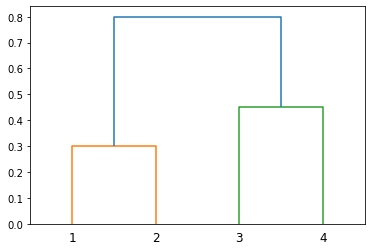

In [349]:
# reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
labels=range(1,5) # relabel the observations
Z = linkage(m, 'complete')  #complete linkage
dendrogram(Z,labels=labels)
plt.show()

<h5>(b) Repeat (a), this time using single linkage clustering.</h5>

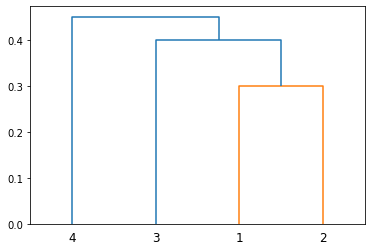

In [350]:
labels=range(1,5) # relabel the observations
Z = linkage(m, 'single')  #single linkage
dendrogram(Z,labels=labels) # relabel the observations
plt.show()

<h5>(c) Suppose that we cut the dendrogram obtained in (a) such that two clusters result. Which observations are in each cluster?</h5>

If there are two clusters (cluster 1, cluster 2),as the graph shown above, the observation 1, 2 are in the same cluster (cluster 1), and the observation 3,4 are in the same cluster (cluster 2)

<h5>(d) Suppose that we cut the dendrogram obtained in (b) such that two clusters result. Which observations are in each cluster?</h5>

If there are two clusters (cluster 1, cluster 2),as the graph shown above, the observation 1, 2,3 are in the same cluster (cluster 1), and the observation 4 is in the other cluster (cluster 2)

<h5>(e) It is mentioned in the chapter that at each fusion in the den- drogram, the position of the two clusters being fused can be swapped without changing the meaning of the dendrogram. Draw a dendrogram that is equivalent to the dendrogram in (a), for which two or more of the leaves are repositioned, but for which the meaning of the dendrogram is the same.</h5>

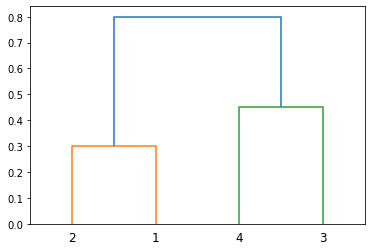

In [351]:
label=[2,1,4,3] # repositioned two or more leaves
Z = linkage(m, 'complete')  #complete linkage
dendrogram(Z,labels=label)
plt.show()